<a href="https://colab.research.google.com/github/AnIsAsPe/ClasificadorClientesTelecom/blob/master/Copia_de_Confort_en_ambientes_de_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confort en ambientes de trabajo

# Preparación de Datos para K-means

## 0. Cargar Bibliotecas

In [ ]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.1)


In [ ]:
import pandas as pd
import numpy as np



from sklearn.preprocessing import MinMaxScaler, StandardScaler  #estandarizar varibles
from sklearn.decomposition import PCA   # análisis de componentes principales
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from google.colab import files  #funcion para subir archivo csv a google colab

import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Subir archivo de datos

files.upload()  #subir arcivo compradores_en_linea.csv

## Leer datos y convertirlos a Data Frame

In [ ]:
df = pd.read_csv('train_input_2yaM34J.csv',
                    index_col=['ID'], parse_dates=['Date'])
df


,Date,Temperature,Humidity,Humex,CO2,Bright
ID,,,,,,
0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0
1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0
2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0
3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0
4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0
...,...,...,...,...,...,...
7995,2018-02-18 17:30:00,20.5,26.0,18.4,390.0,5.0
7996,2018-02-18 18:00:00,20.4,26.0,18.3,383.0,2.0
7997,2018-02-18 18:30:00,20.3,26.0,18.2,377.0,1.0


## ¿Usar variable de tiempo?

In [ ]:
df = df.reset_index().set_index('Date', drop=True)
df.head()

,ID,Temperature,Humidity,Humex,CO2,Bright
Date,,,,,,
2017-08-31 23:30:00,0,22.7,56.0,25.7,534.0,1.0
2017-09-01 00:30:00,1,22.8,55.0,25.7,506.0,1.0
2017-09-01 01:30:00,2,22.9,55.0,25.9,577.0,1.0
2017-09-01 02:30:00,3,23.0,55.0,26.1,630.0,1.0
2017-09-01 03:30:00,4,23.0,55.0,26.1,643.0,1.0


sugerencia: prueba qué hace `df.columns[1:]` en una celda para que entiendas mejor la siguiente.

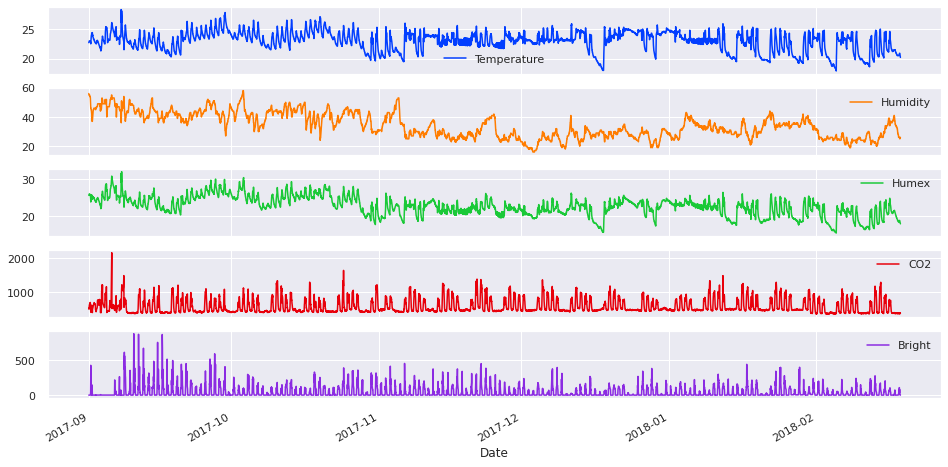

In [ ]:
sns.set(palette="bright")
df[df.columns[1:]].plot(subplots=True, figsize=(16,8))
plt.show()

In [ ]:
df.head(10)

,ID,Temperature,Humidity,Humex,CO2,Bright
Date,,,,,,
2017-08-31 23:30:00,0,22.7,56.0,25.7,534.0,1.0
2017-09-01 00:30:00,1,22.8,55.0,25.7,506.0,1.0
2017-09-01 01:30:00,2,22.9,55.0,25.9,577.0,1.0
2017-09-01 02:30:00,3,23.0,55.0,26.1,630.0,1.0
2017-09-01 03:30:00,4,23.0,55.0,26.1,643.0,1.0
2017-09-01 04:30:00,5,23.0,54.0,25.9,674.0,1.0
2017-09-01 05:30:00,6,23.0,54.0,25.9,672.0,1.0
2017-09-01 06:30:00,7,22.9,54.0,25.7,703.0,1.0
2017-09-01 07:30:00,8,22.9,53.0,25.6,688.0,2.0


In [ ]:
df.tail(10)

,ID,Temperature,Humidity,Humex,CO2,Bright
Date,,,,,,
2018-02-18 15:00:00,7990,20.9,26.0,18.9,385.0,59.0
2018-02-18 15:30:00,7991,20.9,26.0,18.9,380.0,84.0
2018-02-18 16:00:00,7992,20.9,25.0,18.8,387.0,41.0
2018-02-18 16:30:00,7993,20.8,25.0,18.6,378.0,27.0
2018-02-18 17:00:00,7994,20.6,26.0,18.5,398.0,17.0
2018-02-18 17:30:00,7995,20.5,26.0,18.4,390.0,5.0
2018-02-18 18:00:00,7996,20.4,26.0,18.3,383.0,2.0
2018-02-18 18:30:00,7997,20.3,26.0,18.2,377.0,1.0
2018-02-18 19:00:00,7998,20.2,26.0,18.0,385.0,1.0


In [ ]:
len(df['2017-09-01']) == len(df['2018-02-18'])

False

In [ ]:
print(len(df['2017-09-01']), len(df['2018-02-18']))

24 40


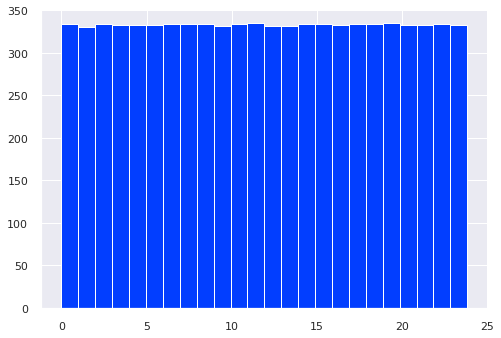

In [ ]:
df['Hour']  = df.index.hour + (df.index.minute/60)
df.Hour.hist(bins=24)

In [ ]:
df.head()

,ID,Temperature,Humidity,Humex,CO2,Bright,Hour
Date,,,,,,,
2017-08-31 23:30:00,0,22.7,56.0,25.7,534.0,1.0,23.5
2017-09-01 00:30:00,1,22.8,55.0,25.7,506.0,1.0,0.5
2017-09-01 01:30:00,2,22.9,55.0,25.9,577.0,1.0,1.5
2017-09-01 02:30:00,3,23.0,55.0,26.1,630.0,1.0,2.5
2017-09-01 03:30:00,4,23.0,55.0,26.1,643.0,1.0,3.5


### Observaciones de la variable fecha
1. No existe un periodo constante de las mediciones, hay días con una sola medición (la del principio), días con 24 mediciones y días con 40.
2. Las series de tiempo inician el 31 de agosto de 2017 y terminan el 18 de febrero de 2018, es decir se cuenta con mediciones de poco menos de seis meses
3. Se asume que existe relación entre las condiciones dentro del edificio y las condiciones afuera de éste (luz, temperatura, humedad), por ello se considra la variable hora del día.



# Exploración de datos

In [ ]:
datos = df.copy().reset_index().set_index('ID')
datos.drop('Date',axis= 1, inplace=True)
datos

,Temperature,Humidity,Humex,CO2,Bright,Hour
ID,,,,,,
0,22.7,56.0,25.7,534.0,1.0,23.5
1,22.8,55.0,25.7,506.0,1.0,0.5
2,22.9,55.0,25.9,577.0,1.0,1.5
3,23.0,55.0,26.1,630.0,1.0,2.5
4,23.0,55.0,26.1,643.0,1.0,3.5
...,...,...,...,...,...,...
7995,20.5,26.0,18.4,390.0,5.0,17.5
7996,20.4,26.0,18.3,383.0,2.0,18.0
7997,20.3,26.0,18.2,377.0,1.0,18.5


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Humex        8000 non-null   float64
 3   CO2          8000 non-null   float64
 4   Bright       8000 non-null   float64
 5   Hour         8000 non-null   float64
dtypes: float64(6)
memory usage: 437.5 KB


## ¿Existen casos faltantes?




En caso afirmativo:
1. Remover renglones con valores faltantes

  `dropna()`
2. Imputar valores faltante con el promedio, la mediana o la moda de la columna.

  `fillna(df.columna.mean()`
3. Valor estimado mediante otro modelo de aprendizaje de máquina.

In [ ]:
datos.isna().sum()

Temperature    0
Humidity       0
Humex          0
CO2            0
Bright         0
Hour           0
dtype: int64

## Distribución y correlación entre variables

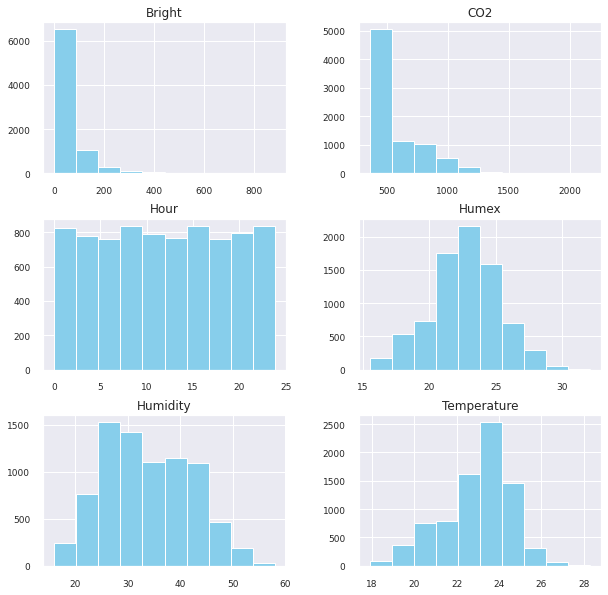

In [ ]:
datos.hist(figsize = (10,10), xlabelsize=9, ylabelsize=9,
                               color='skyblue')
plt.show()

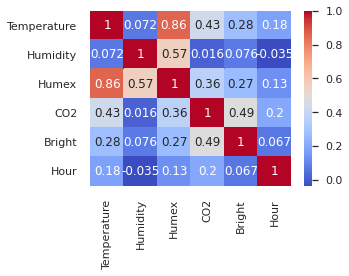

In [ ]:
def correlacion(dataframe, grafica = True):
    corr=dataframe.corr()                #creamos la matriz de correlación
    fig = plt.figure(figsize = (5, 4))
    if grafica == True:
        sns.heatmap(corr, cmap="coolwarm", annot=True, square=False)
        fig.tight_layout()
    return corr
correlaciones = correlacion(datos)

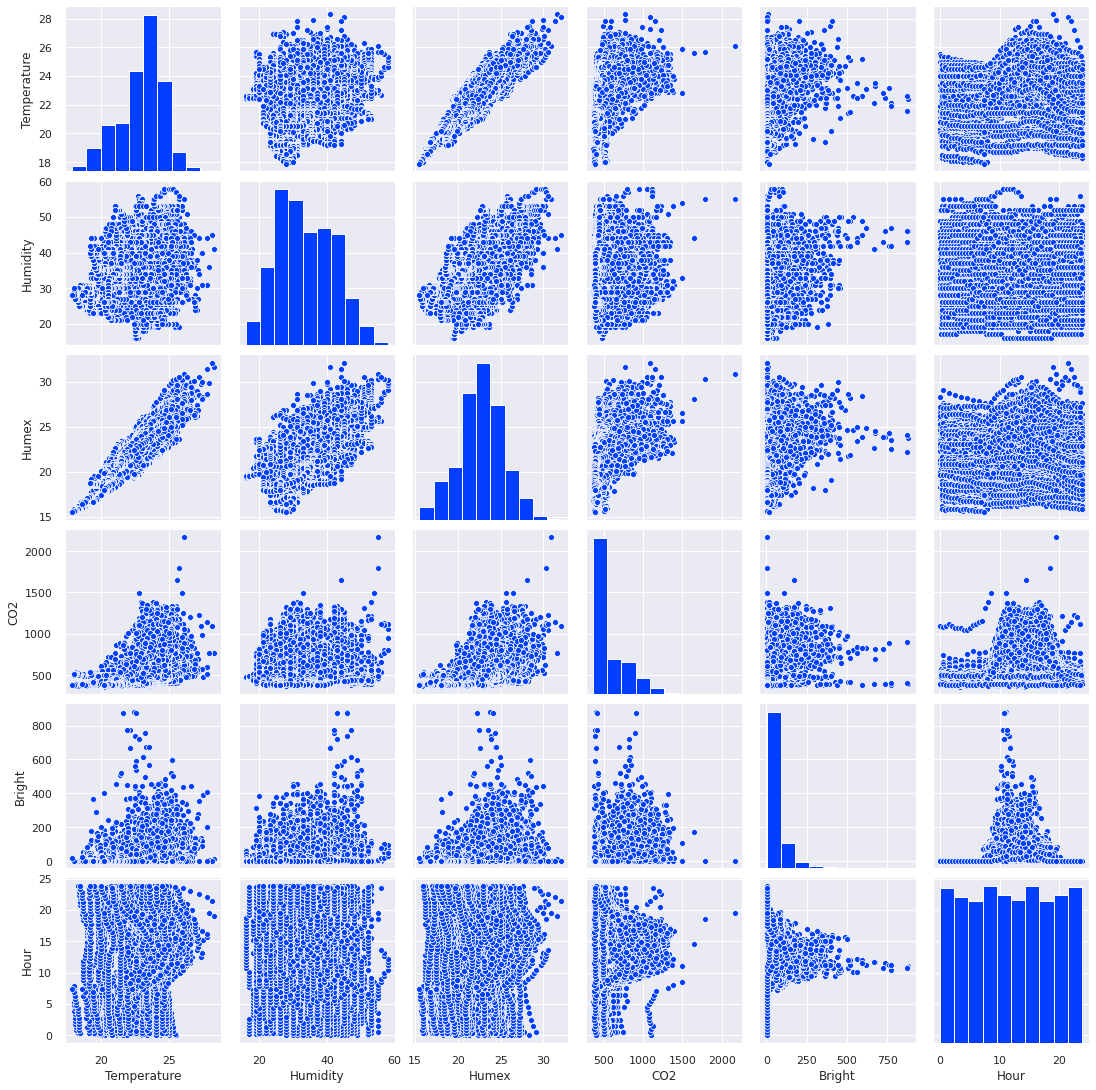

In [ ]:
g = sns.pairplot(datos, palette ='Dark2')

plt.show()

## Unificar escalas de medición de cada variable

In [ ]:
datos_escalados = datos.copy()
columnas = datos.columns

escala = MinMaxScaler()


datos_escalados[columnas] = escala.fit_transform(datos[columnas])
datos_escalados


,Temperature,Humidity,Humex,CO2,Bright,Hour
ID,,,,,,
0,0.461538,0.952381,0.614458,0.095739,0.000000,0.986014
1,0.471154,0.928571,0.614458,0.080243,0.000000,0.020979
2,0.480769,0.928571,0.626506,0.119535,0.000000,0.062937
3,0.490385,0.928571,0.638554,0.148866,0.000000,0.104895
4,0.490385,0.928571,0.638554,0.156060,0.000000,0.146853
...,...,...,...,...,...,...
7995,0.250000,0.238095,0.174699,0.016049,0.004540,0.734266
7996,0.240385,0.238095,0.168675,0.012175,0.001135,0.755245
7997,0.230769,0.238095,0.162651,0.008854,0.000000,0.776224


# Análisis de Componentes Principales

In [ ]:
pca = PCA()
componentes = pca.fit_transform(datos_escalados) #devuelve np array
num_componentes = datos_escalados.shape[1]
nombres_col = ['componente'+str(i+1) for i in range(num_componentes)]
componentes = pd.DataFrame(data = componentes, columns = nombres_col)
componentes

,componente1,componente2,componente3,componente4,componente5,componente6
0,-0.503815,0.311452,0.445950,-0.032917,-0.027354,-0.008197
1,0.417737,0.529148,0.258203,-0.020980,-0.039422,-0.005700
2,0.368902,0.535230,0.246835,0.002823,-0.059797,-0.002679
3,0.321265,0.540000,0.238159,0.018992,-0.074647,0.000338
4,0.280367,0.530901,0.243588,0.023240,-0.077691,0.000285
...,...,...,...,...,...,...
7995,-0.107945,-0.438528,0.136946,-0.015996,0.026420,0.007475
7996,-0.124345,-0.451801,0.149022,-0.017509,0.025831,0.008838
7997,-0.140915,-0.464785,0.160651,-0.017391,0.026820,0.010193
7998,-0.157385,-0.480179,0.171260,-0.009586,0.024364,0.007102


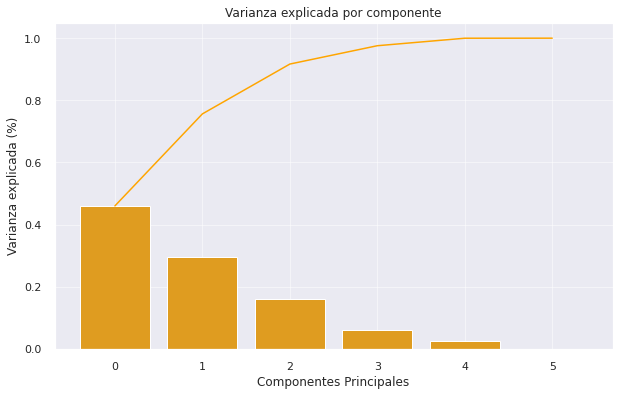

In [ ]:
ind = list(range(num_componentes))
var_exp = pca.explained_variance_ratio_
var_acumulada = np.cumsum(var_exp)

plt.figure(figsize=(10,6))

ax = sns.barplot(ind, var_exp, color='orange', ci=None)
ax2 = sns.lineplot(ind, var_acumulada, color='orange', ci=None)
ax.grid(b=True, which='major', linewidth=0.5)

ax.set_xlabel("Componentes Principales")
ax.set_ylabel("Varianza explicada (%)")
plt.title('Varianza explicada por componente');


In [ ]:
var_acumulada

array([0.46010296, 0.75622357, 0.9166739 , 0.97568731, 0.99983064,
       1.        ])

In [ ]:
componentes = componentes[componentes.columns[0:3]]
componentes

,componente1,componente2,componente3
0,-0.503815,0.311452,0.445950
1,0.417737,0.529148,0.258203
2,0.368902,0.535230,0.246835
3,0.321265,0.540000,0.238159
4,0.280367,0.530901,0.243588
...,...,...,...
7995,-0.107945,-0.438528,0.136946
7996,-0.124345,-0.451801,0.149022
7997,-0.140915,-0.464785,0.160651
7998,-0.157385,-0.480179,0.171260


# Selección del número de clústers 

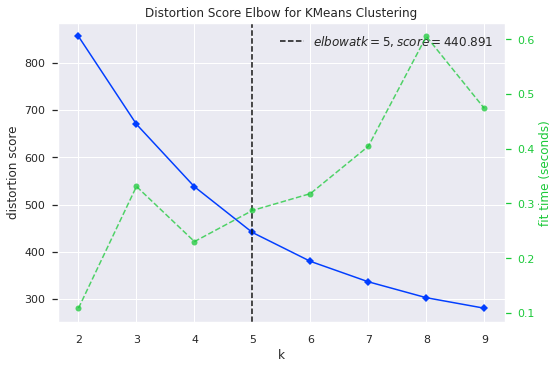

In [ ]:
#Elección de número de clústers por el métod de codo (Elbow Method)
codo = KElbowVisualizer(KMeans(), k=(2,10) )
codo.fit(componentes)
codo.poof()

# Evaluación de la distancia interna y externa de clusters (Coeficiente de Silhouette)



Es un método de interpretación y validación de la coherencia de clústers.

El coeficiente de Silhouette evalúa la cercania entre puntos de un mismo cluster al mismo tiempo que la distancia a los clusters vecinos.
 
El coeficiente de Silhouette oscila entre -1 y 1 donde 1 indica un clúster de alta densidad y -1 que no existe densidad alguna.

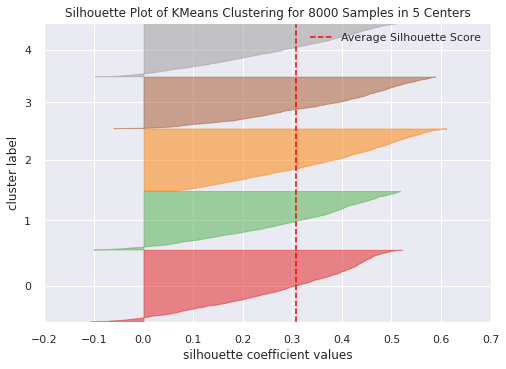

In [ ]:
model = KMeans(5)
graf_sil = SilhouetteVisualizer(model)
graf_sil.fit(componentes)
graf_sil.poof()

# K means

In [ ]:
model = KMeans(n_clusters = 5, random_state=37).fit(componentes)
clusters = model.predict(componentes)

In [ ]:
datos.insert(0, 'componente1', componentes['componente1'])
datos.insert(1, 'componente2', componentes['componente2'])
datos.insert(2, 'componente3', componentes['componente3'])
datos.insert(3, 'cluster', clusters+1)
datos

,componente1,componente2,componente3,Temperature,cluster,Humidity,Humex,CO2,Bright,Hour
ID,,,,,,,,,,
0,-0.503815,0.311452,0.445950,22.7,5,56.0,25.7,534.0,1.0,23.5
1,0.417737,0.529148,0.258203,22.8,1,55.0,25.7,506.0,1.0,0.5
2,0.368902,0.535230,0.246835,22.9,1,55.0,25.9,577.0,1.0,1.5
3,0.321265,0.540000,0.238159,23.0,1,55.0,26.1,630.0,1.0,2.5
4,0.280367,0.530901,0.243588,23.0,1,55.0,26.1,643.0,1.0,3.5
...,...,...,...,...,...,...,...,...,...,...
7995,-0.107945,-0.438528,0.136946,20.5,2,26.0,18.4,390.0,5.0,17.5
7996,-0.124345,-0.451801,0.149022,20.4,2,26.0,18.3,383.0,2.0,18.0
7997,-0.140915,-0.464785,0.160651,20.3,2,26.0,18.2,377.0,1.0,18.5


In [ ]:
datos.cluster.value_counts(sort=False)

4    1682
1    1382
5    1428
2    1574
3    1934
Name: cluster, dtype: int64

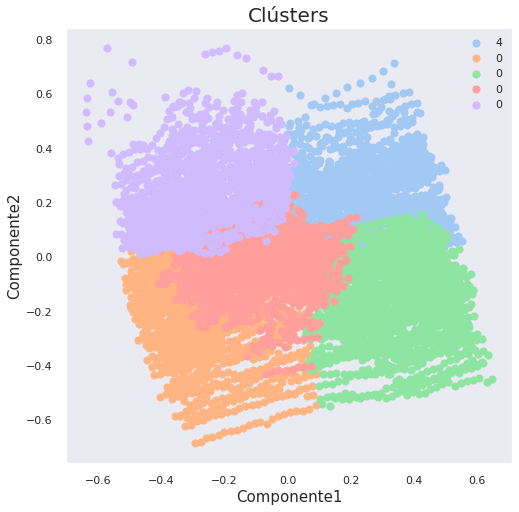

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente1', fontsize = 15)
ax.set_ylabel('Componente2', fontsize = 15)
ax.set_title('Clústers', fontsize = 20)

sns.set_palette('pastel')
for cluster in sorted(datos.cluster.unique()):
    indicesToKeep = datos['cluster'] == cluster
    ax.scatter(datos.loc[indicesToKeep, 'componente1']
               , datos.loc[indicesToKeep, 'componente2']
               , s = 50)
ax.legend(clusters)
ax.grid()

In [ ]:
datos.head()

,componente1,componente2,componente3,Temperature,cluster,Humidity,Humex,CO2,Bright,Hour
ID,,,,,,,,,,
0,-0.503815,0.311452,0.445950,22.7,5,56.0,25.7,534.0,1.0,23.5
1,0.417737,0.529148,0.258203,22.8,1,55.0,25.7,506.0,1.0,0.5
2,0.368902,0.535230,0.246835,22.9,1,55.0,25.9,577.0,1.0,1.5
3,0.321265,0.540000,0.238159,23.0,1,55.0,26.1,630.0,1.0,2.5
4,0.280367,0.530901,0.243588,23.0,1,55.0,26.1,643.0,1.0,3.5


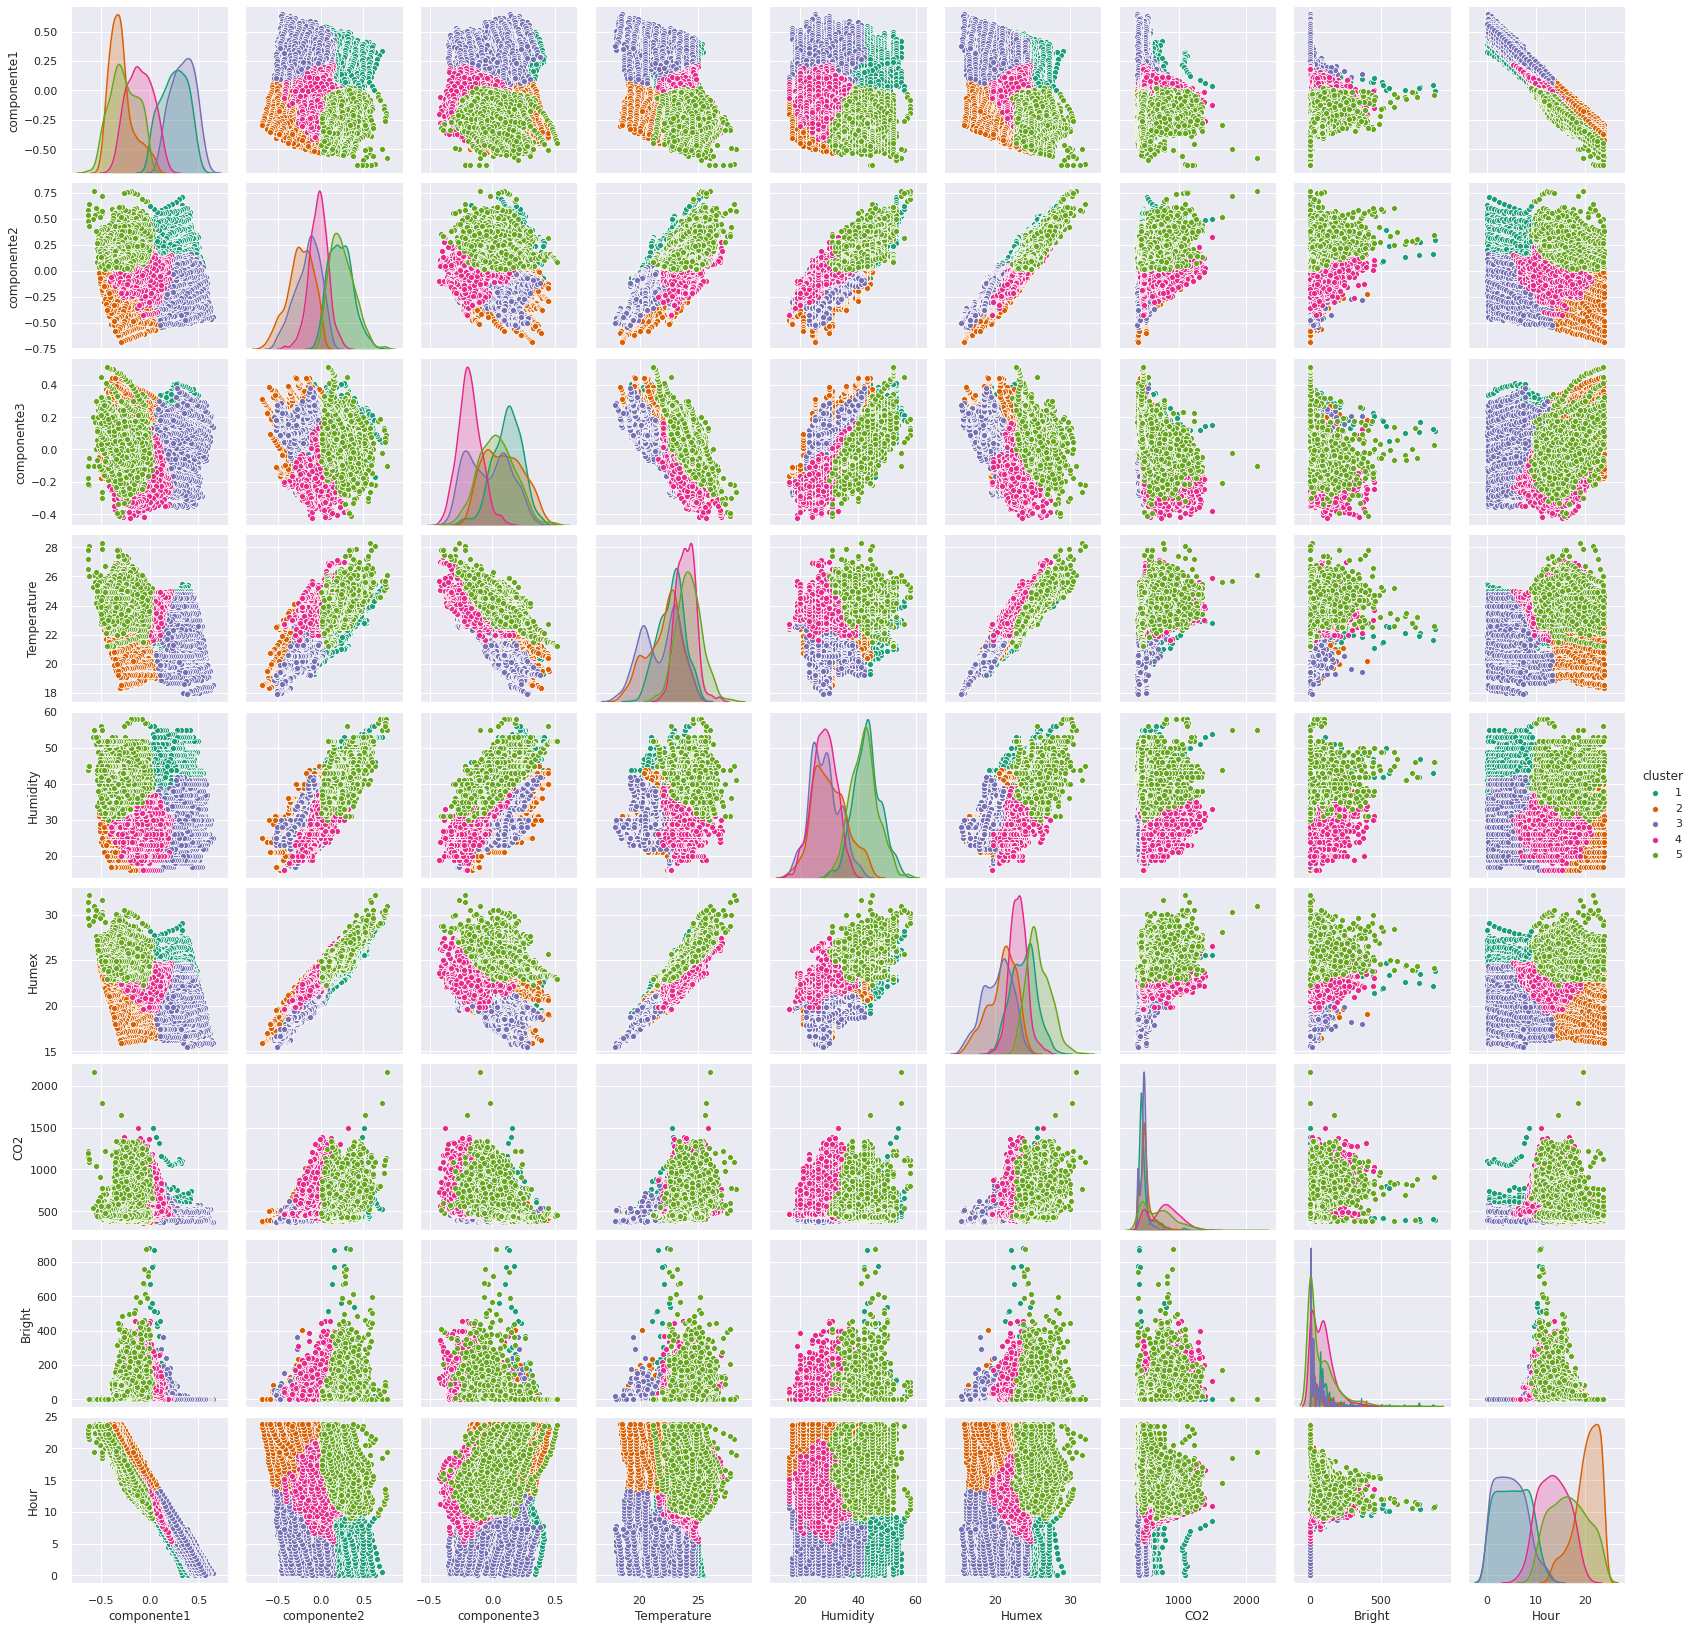

In [ ]:
sns.set_palette('Dark2')
g = sns.pairplot(datos, hue='cluster')

plt.show()

In [ ]:
Y = pd.read_csv('train_output_2kCtjpF.csv',index_col=['ID'])
Y.head()

,Score
ID,
0,4.0
1,4.0
2,4.0
3,2.0
4,3.0


In [ ]:
Y.Score.value_counts()

3.0    3362
2.0    2181
4.0    1860
1.0     358
5.0     239
Name: Score, dtype: int64

In [ ]:
metrics.accuracy_score(Y,datos.cluster)

0.18725